In [31]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objs as go

df = pd.read_csv("papers.csv")#, dtype = str)
df

,paper,cites,kw,citations
0,1,[],E,4
1,2,[1],E,10
2,3,"[1,2]",LCA,5
3,4,[3],CM,3
4,5,"[2,4]",E+LCA,1
5,6,"[5,2,3]",E,14
6,7,"[5,6,3]",CM+LCA,8
7,8,"[1,7]",CM,3


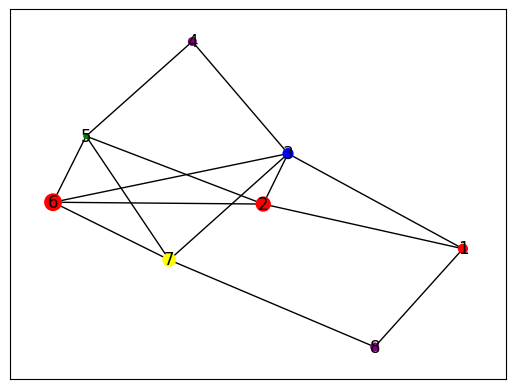

In [32]:

# Define the graph
G = nx.Graph()

# Add nodes with properties
for i, row in df.iterrows():
    G.add_node(row["paper"], type=row["kw"], weight=row["citations"])

# Add edges between nodes
for i, row in df.iterrows():
    if len(row["cites"])>0:
        for cit in row["cites"]:
            if cit not in ["[","]",","]:
                G.add_edge(row["paper"], int(cit))
                #print(row["paper"], cit)


# Define node colors based on type
node_colors = {'E': 'red', 'LCA': 'blue', "CM":"purple", "E+LCA":"green", "CM+LCA":"yellow"}

colors = [node_colors[G.nodes[node]['type']] for node in G.nodes()]

# Define node sizes based on weight
node_sizes = [G.nodes[node]['weight']*10 for node in G.nodes()]

# Plot the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_color=colors, node_size=node_sizes, with_labels=True)

# Show the plot
plt.show()


In [33]:
pos = nx.spring_layout(G, k=0.5, iterations=100)
for n, p in pos.items():
    G.nodes[n]['pos'] = p
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

In [34]:
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='pinkyl',
        reversescale=True,
        color=colors,
        size=[x**1.5 for x in df["citations"]],
        colorbar=dict(
            thickness=1,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color'] += tuple([len(adjacencies[1])])
    node_info = adjacencies[0]
    node_trace['text'] += tuple([node_info])

In [35]:
title = "Network Graph Demonstration"
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                title=title,
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=21, l=5, r=5, t=40),
                annotations=[dict(
                    text="Text Here",
                    showarrow=False,
                    xref="paper", yref="paper")],
                xaxis=dict(showgrid=False, zeroline=False,
                           showticklabels=False, mirror=True),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False, mirror=True)))
fig.show()